# Email Spam Classification using Support Vector Machine (SVM)

---

## Table of Contents
1. Business Understanding & Problem Definition
2. Data Collection & Loading
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing & Feature Engineering
5. Model Development
6. Model Evaluation
7. Conclusion

---
## 1. Business Understanding & Problem Definition

### Problem Statement
Email spam is a persistent problem that affects productivity and security. The goal of this project is to develop a machine learning model that can automatically classify emails as spam or legitimate (ham) based on their content features.

### Objectives
- Build a robust classification model to identify spam emails
- Achieve high accuracy while minimizing false positives (legitimate emails marked as spam)
- Provide insights into which features are most indicative of spam

### Success Criteria
- Accuracy > 90%
- High precision to minimize false positives
- Model should be interpretable and maintainable

---
## 2. Data Collection & Loading

### Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning - Models (SVM only)
from sklearn.svm import SVC

# Machine Learning - Evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score, ConfusionMatrixDisplay)

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


### Load Dataset

In [2]:
# Load the email spam dataset
try:
    data = pd.read_csv("emails.csv")
    print(f"✓ Dataset loaded successfully!")
    print(f"✓ Dataset shape: {data.shape}")
    print(f"✓ Number of samples: {data.shape[0]}")
    print(f"✓ Number of features: {data.shape[1]}")
except FileNotFoundError:
    print("Error: 'emails.csv' not found. Please ensure the file is in the working directory.")
    
# Display first few rows
data.head()

✓ Dataset loaded successfully!
✓ Dataset shape: (5172, 3002)
✓ Number of samples: 5172
✓ Number of features: 3002


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


---
## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset Overview

In [3]:
# Get comprehensive information about the dataset
print("="*60)
print("DATASET INFORMATION")
print("="*60)
data.info()
print("\n" + "="*60)
print(f"Memory Usage: {data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*60)

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB

Memory Usage: 118.71 MB


In [4]:
# Statistical summary
print("="*60)
print("STATISTICAL SUMMARY")
print("="*60)
data.describe(include='all').T

STATISTICAL SUMMARY


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email No.,5172,5172,Email 1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the,5172.0,NaN,NaN,NaN,6.640565,11.745009,0.0,0.0,3.0,8.0,210.0
to,5172.0,NaN,NaN,NaN,6.188128,9.534576,0.0,1.0,3.0,7.0,132.0
ect,5172.0,NaN,NaN,NaN,5.143852,14.101142,1.0,1.0,1.0,4.0,344.0
and,5172.0,NaN,NaN,NaN,3.075599,6.04597,0.0,0.0,1.0,3.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...
military,5172.0,NaN,NaN,NaN,0.006574,0.138908,0.0,0.0,0.0,0.0,4.0
allowing,5172.0,NaN,NaN,NaN,0.00406,0.072145,0.0,0.0,0.0,0.0,3.0
ff,5172.0,NaN,NaN,NaN,0.914733,2.780203,0.0,0.0,0.0,1.0,114.0
dry,5172.0,NaN,NaN,NaN,0.006961,0.098086,0.0,0.0,0.0,0.0,4.0


### 3.2 Data Quality Check

In [5]:
# Check for missing values
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing_df.to_string(index=False))
    
print(f"\nTotal missing values: {data.isnull().sum().sum()}")

MISSING VALUES ANALYSIS
✓ No missing values found in the dataset!

Total missing values: 0


In [6]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print("="*60)
print("DUPLICATE ROWS CHECK")
print("="*60)
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(data)*100):.2f}%")

if duplicates > 0:
    print("\n⚠ Warning: Duplicate rows found! Consider removing them during preprocessing.")

DUPLICATE ROWS CHECK
Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [7]:
# Data types and basic statistics
print("="*60)
print("DATA TYPES")
print("="*60)
print(data.dtypes.value_counts())
print("\n" + "="*60)
print("DATASET DIMENSIONS")
print("="*60)
print(f"Rows: {data.shape[0]:,}")
print(f"Columns: {data.shape[1]:,}")

DATA TYPES
int64     3001
object       1
Name: count, dtype: int64

DATASET DIMENSIONS
Rows: 5,172
Columns: 3,002


### 3.3 Target Variable Analysis

In [8]:
# Analyze target variable distribution
if 'Prediction' in data.columns:
    print("="*60)
    print("TARGET VARIABLE DISTRIBUTION")
    print("="*60)
    target_counts = data['Prediction'].value_counts()
    target_percentage = data['Prediction'].value_counts(normalize=True) * 100
    
    target_df = pd.DataFrame({
        'Class': target_counts.index,
        'Count': target_counts.values,
        'Percentage': target_percentage.values
    })
    print(target_df.to_string(index=False))
    print(f"\nClass Balance Ratio: {target_counts.min() / target_counts.max():.2f}")
    
    # Check for class imbalance
    if target_counts.min() / target_counts.max() < 0.5:
        print("\n⚠ Warning: Class imbalance detected! Consider using techniques like SMOTE or class weights.")
    else:
        print("\n✓ Classes are relatively balanced.")
else:
    print("Target column 'Prediction' not found in dataset")

TARGET VARIABLE DISTRIBUTION
 Class  Count  Percentage
     0   3672    70.99768
     1   1500    29.00232

Class Balance Ratio: 0.41

⚠ Warning: Class imbalance detected! Consider using techniques like SMOTE or class weights.


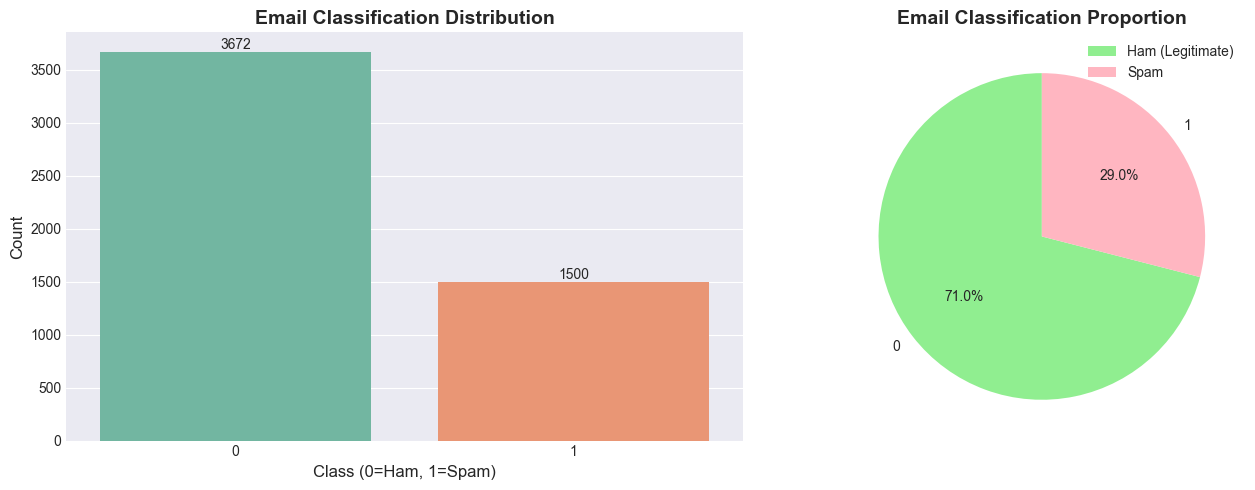

In [9]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
if 'Prediction' in data.columns:
    sns.countplot(x='Prediction', data=data, palette='Set2', ax=axes[0])
    axes[0].set_title('Email Classification Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Class (0=Ham, 1=Spam)', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    
    # Add value labels on bars
    for container in axes[0].containers:
        axes[0].bar_label(container)
    
    # Pie chart
    data['Prediction'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                           colors=['#90EE90', '#FFB6C1'],
                                           ax=axes[1], startangle=90)
    axes[1].set_title('Email Classification Proportion', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')
    axes[1].legend(['Ham (Legitimate)', 'Spam'], loc='best')

plt.tight_layout()
plt.show()

### 3.4 Feature Analysis

TOP 10 FEATURES WITH HIGHEST VARIANCE
e    16089.783052
t     8989.944777
a     7669.235628
o     7276.220404
i     6057.854680
n     5909.836882
r     5121.965867
s     4426.245204
c     2666.991547
l     2280.683999
dtype: float64


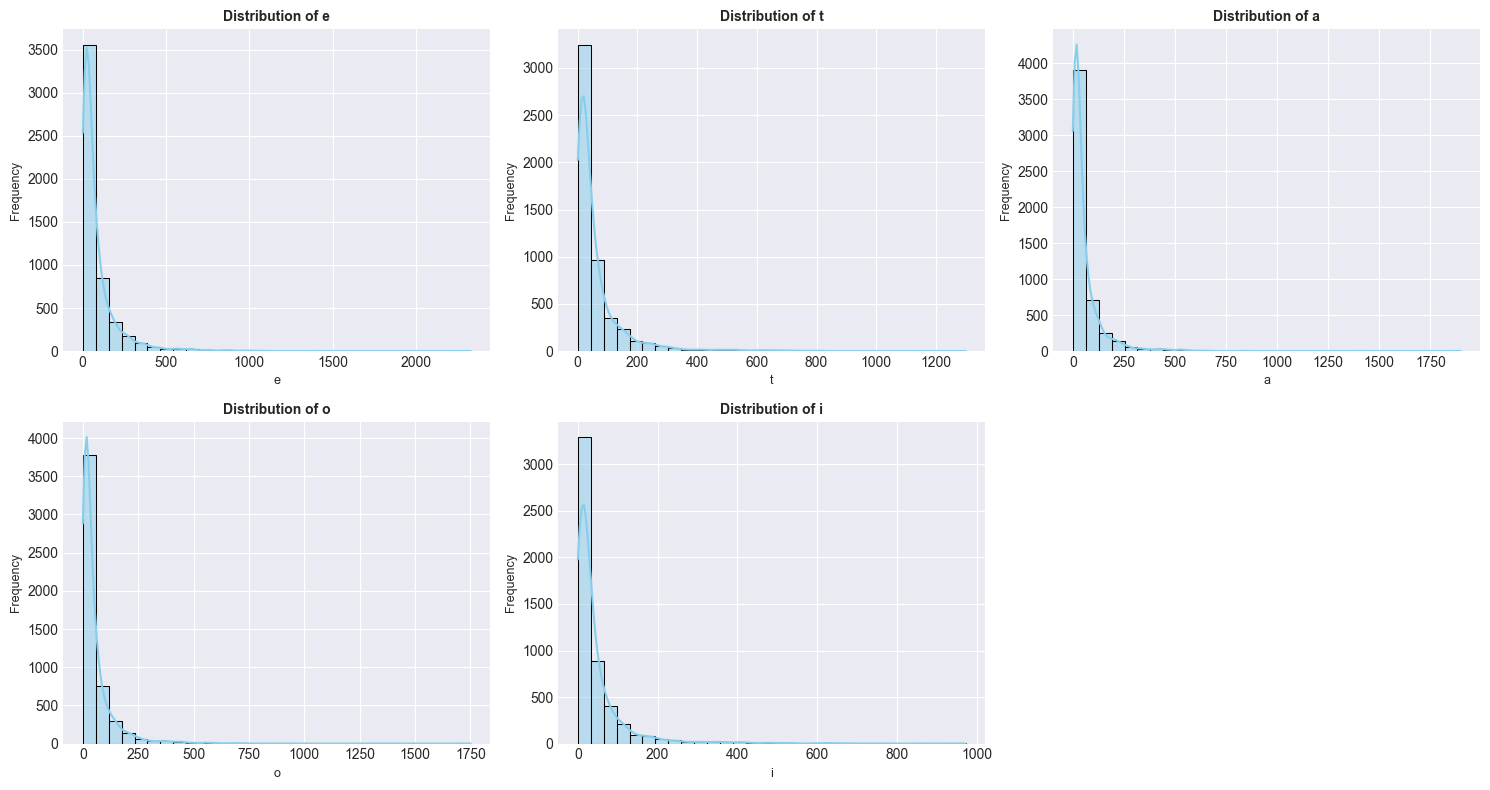

In [10]:
# Analyze feature distributions for top features
# Select numeric columns excluding target and ID columns
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'Prediction' in numeric_cols:
    numeric_cols.remove('Prediction')
if 'Email No.' in numeric_cols:
    numeric_cols.remove('Email No.')

# Display statistics for top 10 features with highest variance
if len(numeric_cols) > 0:
    feature_variance = data[numeric_cols].var().sort_values(ascending=False)
    print("="*60)
    print("TOP 10 FEATURES WITH HIGHEST VARIANCE")
    print("="*60)
    print(feature_variance.head(10))
    
    # Visualize distribution of top 5 features
    top_features = feature_variance.head(5).index.tolist()
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    axes = axes.ravel()
    
    for idx, feature in enumerate(top_features):
        sns.histplot(data[feature], bins=30, kde=True, ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'Distribution of {feature}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=9)
        axes[idx].set_ylabel('Frequency', fontsize=9)
    
    # Remove extra subplot
    fig.delaxes(axes[5])
    
    plt.tight_layout()
    plt.show()
else:
    print("No numeric features found for analysis")

TOP 15 FEATURES CORRELATED WITH TARGET
more            0.258152
our             0.228187
able            0.222219
best            0.221703
ur              0.220253
sex             0.220092
sec             0.217402
money           0.217215
soft            0.213382
dr              0.212413
mo              0.210056
via             0.204031
prescription    0.203896
remove          0.203384
cheap           0.200348
Name: Prediction, dtype: float64

BOTTOM 15 FEATURES CORRELATED WITH TARGET
than        -0.188514
deal        -0.190407
questions   -0.193163
farmer      -0.194693
nom         -0.202600
aren        -0.206063
hp          -0.225846
subject     -0.227754
forwarded   -0.230765
daren       -0.236180
attached    -0.236558
thank       -0.262384
hanks       -0.266070
hpl         -0.266518
thanks      -0.271433
Name: Prediction, dtype: float64


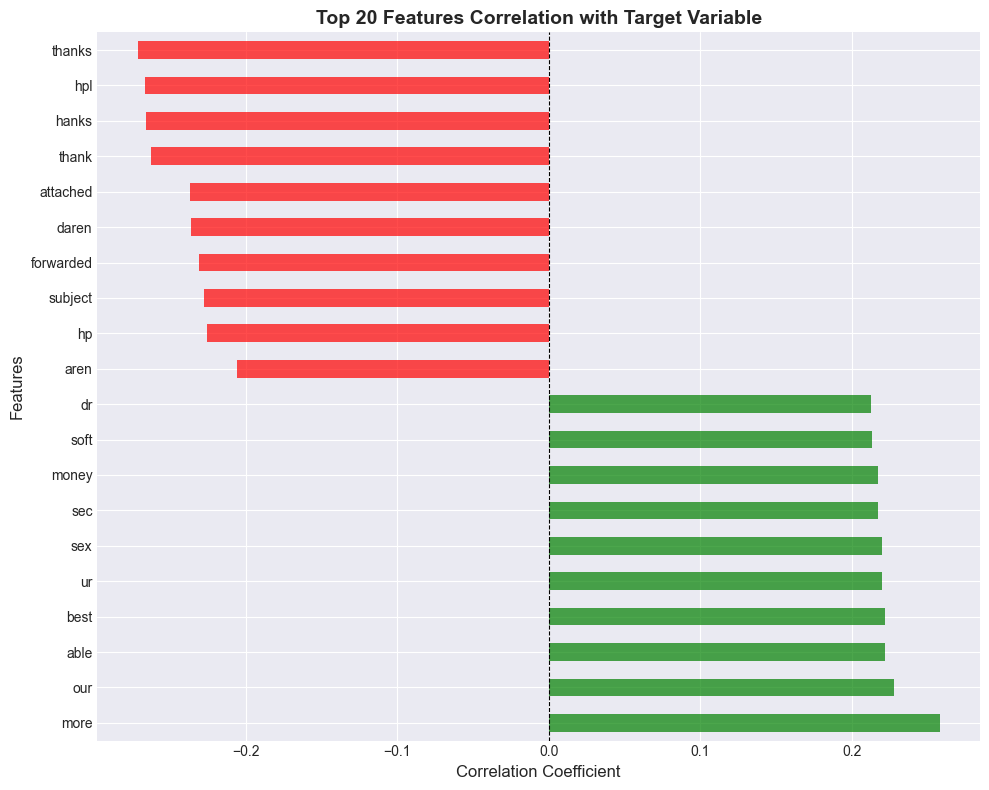

In [11]:
# Correlation analysis
if len(numeric_cols) > 0:
    # Calculate correlation with target variable
    if 'Prediction' in data.columns:
        correlations = data[numeric_cols + ['Prediction']].corr()['Prediction'].drop('Prediction').sort_values(ascending=False)
        
        print("="*60)
        print("TOP 15 FEATURES CORRELATED WITH TARGET")
        print("="*60)
        print(correlations.head(15))
        print("\n" + "="*60)
        print("BOTTOM 15 FEATURES CORRELATED WITH TARGET")
        print("="*60)
        print(correlations.tail(15))
        
        # Visualize top correlations
        fig, ax = plt.subplots(figsize=(10, 8))
        top_correlations = pd.concat([correlations.head(10), correlations.tail(10)])
        colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
        top_correlations.plot(kind='barh', ax=ax, color=colors, alpha=0.7)
        ax.set_title('Top 20 Features Correlation with Target Variable', fontsize=14, fontweight='bold')
        ax.set_xlabel('Correlation Coefficient', fontsize=12)
        ax.set_ylabel('Features', fontsize=12)
        ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
        plt.tight_layout()
        plt.show()

---
## 4. Data Preprocessing & Feature Engineering

### 4.1 Handle Unnecessary Columns

In [12]:
# Create a copy of the data for preprocessing
data_processed = data.copy()

# Remove ID column if present (Email No. is just an identifier)
columns_to_drop = []
if 'Email No.' in data_processed.columns:
    columns_to_drop.append('Email No.')
    
if columns_to_drop:
    data_processed = data_processed.drop(columns_to_drop, axis=1)
    print(f"✓ Dropped columns: {columns_to_drop}")
    print(f"✓ Remaining features: {data_processed.shape[1]}")
else:
    print("No ID columns to drop")

# Remove duplicates if any
initial_rows = len(data_processed)
data_processed = data_processed.drop_duplicates()
removed_duplicates = initial_rows - len(data_processed)

if removed_duplicates > 0:
    print(f"✓ Removed {removed_duplicates} duplicate rows")
else:
    print("✓ No duplicate rows found")

print(f"\nFinal preprocessed dataset shape: {data_processed.shape}")

✓ Dropped columns: ['Email No.']
✓ Remaining features: 3001
✓ Removed 541 duplicate rows

Final preprocessed dataset shape: (4631, 3001)


### 4.2 Feature-Target Separation

In [13]:
# Separate features and target variable
X = data_processed.drop(['Prediction'], axis=1)
y = data_processed['Prediction']

print("="*60)
print("FEATURE-TARGET SEPARATION")
print("="*60)
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"\nTarget distribution:")
print(y.value_counts().to_string())

FEATURE-TARGET SEPARATION
Features (X) shape: (4631, 3000)
Target (y) shape: (4631,)

Number of features: 3000
Number of samples: 4631

Target distribution:
Prediction
0    3170
1    1461


### 4.3 Train-Test Split

In [14]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE,
    stratify=y  # Maintain class distribution in both sets
)

print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set target distribution:")
print(y_train.value_counts().to_string())
print(f"\nTest set target distribution:")
print(y_test.value_counts().to_string())
print("\n✓ Data split completed with stratification")

TRAIN-TEST SPLIT
Training set size: 3704 samples (80.0%)
Test set size: 927 samples (20.0%)

Training set target distribution:
Prediction
0    2535
1    1169

Test set target distribution:
Prediction
0    635
1    292

✓ Data split completed with stratification


### 4.4 Feature Scaling

Feature scaling is crucial for SVM as it's sensitive to feature magnitudes.

In [15]:
# Apply StandardScaler (z-score normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("="*60)
print("FEATURE SCALING (STANDARDIZATION)")
print("="*60)
print("✓ StandardScaler applied")
print(f"✓ Training set scaled shape: {X_train_scaled.shape}")
print(f"✓ Test set scaled shape: {X_test_scaled.shape}")

# Show scaling statistics
print(f"\nScaling Statistics (Training Set):")
print(f"Mean: {X_train_scaled.mean():.6f} (should be ~0)")
print(f"Std: {X_train_scaled.std():.6f} (should be ~1)")

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

FEATURE SCALING (STANDARDIZATION)
✓ StandardScaler applied
✓ Training set scaled shape: (3704, 3000)
✓ Test set scaled shape: (927, 3000)

Scaling Statistics (Training Set):
Mean: -0.000000 (should be ~0)
Std: 1.000000 (should be ~1)


### 4.5 Handle Class Imbalance using SMOTE

In [16]:
# Install and import SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("="*60)
print("CLASS IMBALANCE HANDLING WITH SMOTE")
print("="*60)
print("\nBefore SMOTE:")
print(f"Class distribution in training set:")
print(y_train.value_counts())
print(f"\nClass ratio: {y_train.value_counts()[0]} : {y_train.value_counts()[1]}")

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=RANDOM_STATE, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print(f"Class distribution in balanced training set:")
print(pd.Series(y_train_smote).value_counts())
print(f"\nNew class ratio: {pd.Series(y_train_smote).value_counts()[0]} : {pd.Series(y_train_smote).value_counts()[1]}")
print(f"\n✓ Training data balanced successfully!")
print(f"Original samples: {len(X_train_scaled)}")
print(f"After SMOTE: {len(X_train_smote)}")
print(f"New synthetic samples created: {len(X_train_smote) - len(X_train_scaled)}")

CLASS IMBALANCE HANDLING WITH SMOTE

Before SMOTE:
Class distribution in training set:
Prediction
0    2535
1    1169
Name: count, dtype: int64

Class ratio: 2535 : 1169

After SMOTE:
Class distribution in balanced training set:
Prediction
1    2535
0    2535
Name: count, dtype: int64

New class ratio: 2535 : 2535

✓ Training data balanced successfully!
Original samples: 3704
After SMOTE: 5070
New synthetic samples created: 1366


---
## 5. Model Development

### 5.1 Train Support Vector Machine (SVM) Model

In [17]:
# Train SVM classifier on SMOTE-balanced data
print("="*60)
print("TRAINING SVM MODEL")
print("="*60)

# Create and train SVM classifier with RBF kernel
svm_classifier = SVC(
    kernel='rbf',           # Radial Basis Function kernel
    C=1.0,                  # Regularization parameter
    gamma='scale',          # Kernel coefficient
    random_state=RANDOM_STATE,
    probability=True        # Enable probability estimates
)

# Fit on SMOTE-balanced training data
svm_classifier.fit(X_train_smote, y_train_smote)

print(f"\n✓ SVM Model trained successfully!")
print(f"\nModel Parameters:")
print(f"  - Kernel: {svm_classifier.kernel}")
print(f"  - C (Regularization): {svm_classifier.C}")
print(f"  - Gamma: {svm_classifier.gamma}")
print(f"\n✓ Number of support vectors: {sum(svm_classifier.n_support_)}")
print(f"✓ Support vectors per class: {dict(zip(svm_classifier.classes_, svm_classifier.n_support_))}")

TRAINING SVM MODEL

✓ SVM Model trained successfully!

Model Parameters:
  - Kernel: rbf
  - C (Regularization): 1.0
  - Gamma: scale

✓ Number of support vectors: 2326
✓ Support vectors per class: {np.int64(0): np.int32(1195), np.int64(1): np.int32(1131)}


### 5.3 Model Predictions

In [18]:
# Make predictions on test set
y_pred_train = svm_classifier.predict(X_train_scaled)
y_pred_test = svm_classifier.predict(X_test_scaled)

print("="*60)
print("PREDICTIONS GENERATED")
print("="*60)
print(f"✓ Training predictions shape: {y_pred_train.shape}")
print(f"✓ Test predictions shape: {y_pred_test.shape}")
print(f"\nTest set prediction distribution:")
print(pd.Series(y_pred_test).value_counts().to_string())

PREDICTIONS GENERATED
✓ Training predictions shape: (3704,)
✓ Test predictions shape: (927,)

Test set prediction distribution:
0    622
1    305


---
## 6. Model Evaluation

### 6.1 Basic Performance Metrics

In [19]:
# Calculate comprehensive performance metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='binary')
recall = recall_score(y_test, y_pred_test, average='binary')
f1 = f1_score(y_test, y_pred_test, average='binary')

print("="*60)
print("SVM MODEL PERFORMANCE METRICS")
print("="*60)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:     {test_accuracy:.4f}")
print(f"\nPrecision:         {precision:.4f}")
print(f"Recall:            {recall:.4f}")
print(f"F1-Score:          {f1:.4f}")

# Check for overfitting
accuracy_diff = train_accuracy - test_accuracy
print(f"\nAccuracy Difference (Train - Test): {accuracy_diff:.4f}")
if accuracy_diff > 0.05:
    print("⚠ Warning: Potential overfitting detected!")
else:
    print("✓ Model generalizes well")

print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred_test, target_names=['Ham (0)', 'Spam (1)']))

SVM MODEL PERFORMANCE METRICS

Training Accuracy: 0.9668
Test Accuracy:     0.9191

Precision:         0.8557
Recall:            0.8938
F1-Score:          0.8744

Accuracy Difference (Train - Test): 0.0477
✓ Model generalizes well

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Ham (0)       0.95      0.93      0.94       635
    Spam (1)       0.86      0.89      0.87       292

    accuracy                           0.92       927
   macro avg       0.90      0.91      0.91       927
weighted avg       0.92      0.92      0.92       927



### 6.2 Confusion Matrix Analysis

In [20]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()

print("="*60)
print("CONFUSION MATRIX BREAKDOWN")
print("="*60)
print(f"True Negatives (TN):  {tn} - Correctly identified Ham emails")
print(f"False Positives (FP): {fp} - Ham emails incorrectly marked as Spam")
print(f"False Negatives (FN): {fn} - Spam emails incorrectly marked as Ham")
print(f"True Positives (TP):  {tp} - Correctly identified Spam emails")
print(f"\nTotal predictions: {tn + fp + fn + tp}")

# Calculate error rates
fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

print(f"\nFalse Positive Rate: {fpr:.4f} ({fp} out of {fp+tn} Ham emails)")
print(f"False Negative Rate: {fnr:.4f} ({fn} out of {fn+tp} Spam emails)")

CONFUSION MATRIX BREAKDOWN
True Negatives (TN):  591 - Correctly identified Ham emails
False Positives (FP): 44 - Ham emails incorrectly marked as Spam
False Negatives (FN): 31 - Spam emails incorrectly marked as Ham
True Positives (TP):  261 - Correctly identified Spam emails

Total predictions: 927

False Positive Rate: 0.0693 (44 out of 635 Ham emails)
False Negative Rate: 0.1062 (31 out of 292 Spam emails)


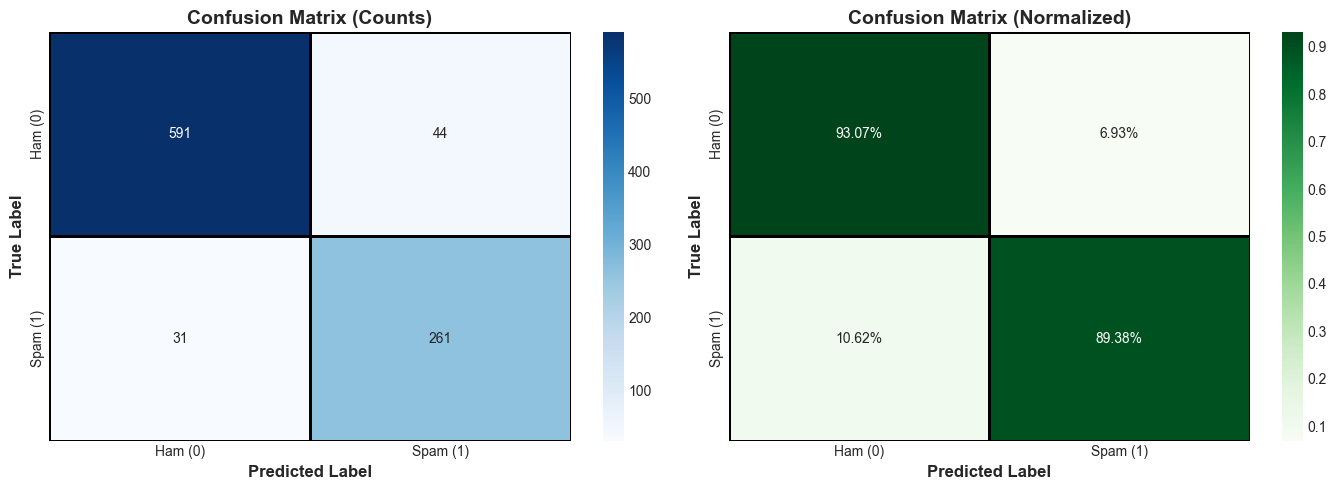

In [21]:
# Visualize confusion matrix with enhanced styling
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Ham (0)', 'Spam (1)'],
            yticklabels=['Ham (0)', 'Spam (1)'],
            ax=axes[0], linewidths=2, linecolor='black')
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Normalized confusion matrix (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', cbar=True,
            xticklabels=['Ham (0)', 'Spam (1)'],
            yticklabels=['Ham (0)', 'Spam (1)'],
            ax=axes[1], linewidths=2, linecolor='black')
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_title('Confusion Matrix (Normalized)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.3 ROC Curve and AUC Score

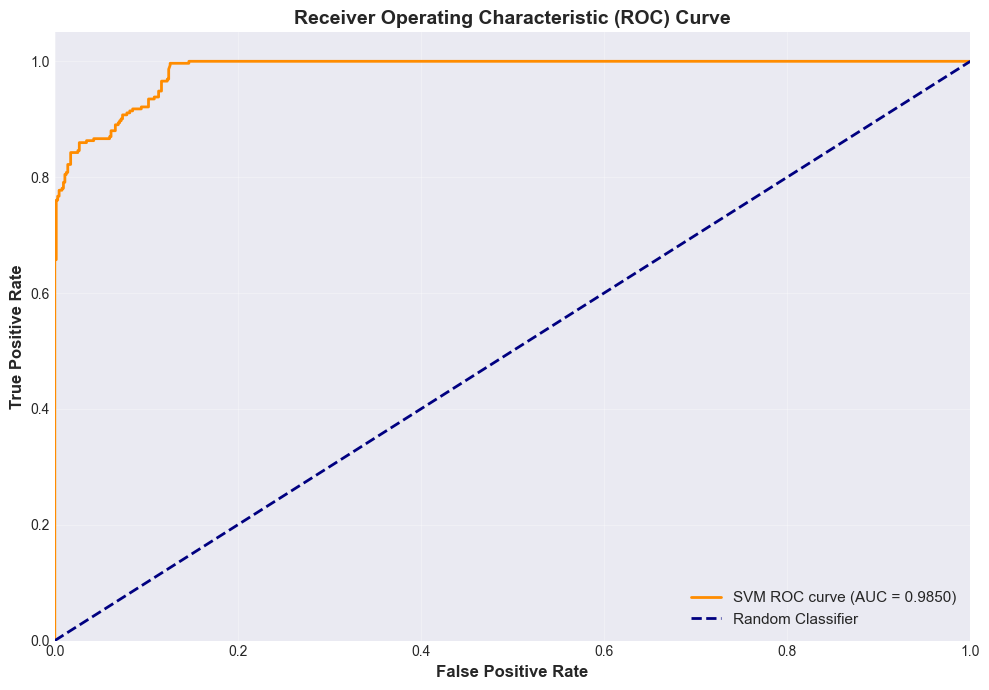

ROC-AUC SCORE
AUC Score: 0.9850
✓ Excellent classification performance!


In [22]:
# Get decision function scores for ROC curve
y_scores = svm_classifier.decision_function(X_test_scaled)

# Calculate ROC curve
fpr_roc, tpr_roc, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_roc, tpr_roc, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)
print("ROC-AUC SCORE")
print("="*60)
print(f"AUC Score: {roc_auc:.4f}")
if roc_auc > 0.9:
    print("✓ Excellent classification performance!")
elif roc_auc > 0.8:
    print("✓ Good classification performance")
else:
    print("⚠ Model performance could be improved")

### 6.4 Cross-Validation Analysis

5-FOLD CROSS-VALIDATION RESULTS
Fold 1: 0.9136
Fold 2: 0.9217
Fold 3: 0.9217
Fold 4: 0.9231
Fold 5: 0.9284

Mean CV Accuracy: 0.9217
Standard Deviation: 0.0047
95% Confidence Interval: [0.9124, 0.9310]


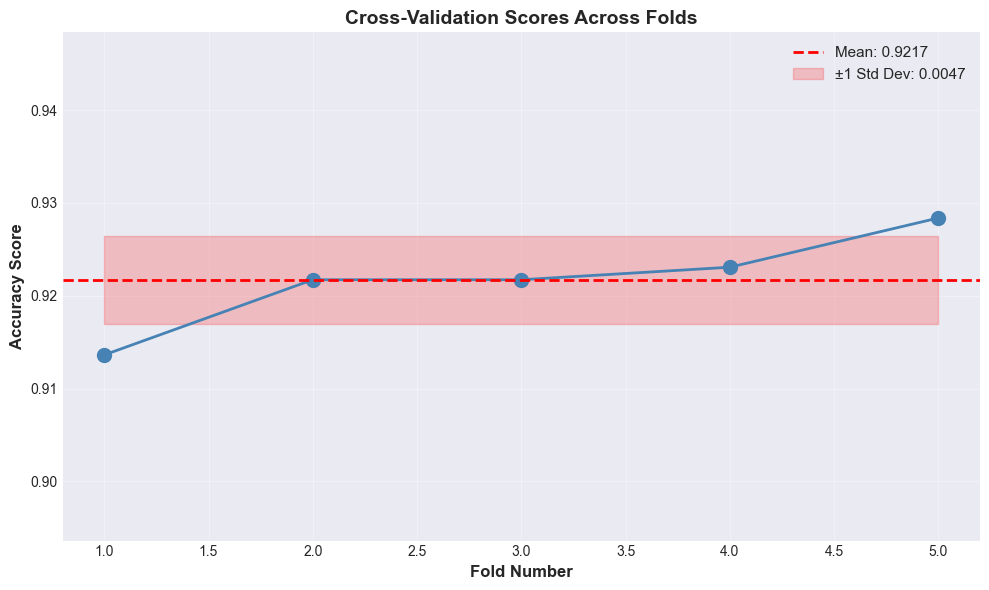

In [23]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("="*60)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("="*60)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print(f"95% Confidence Interval: [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, {cv_scores.mean() + 1.96*cv_scores.std():.4f}]")

# Visualize cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=10, color='steelblue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {cv_scores.mean():.4f}')
plt.fill_between(range(1, 6), 
                  cv_scores.mean() - cv_scores.std(), 
                  cv_scores.mean() + cv_scores.std(), 
                  alpha=0.2, color='red', label=f'±1 Std Dev: {cv_scores.std():.4f}')
plt.xlabel('Fold Number', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12, fontweight='bold')
plt.title('Cross-Validation Scores Across Folds', fontsize=14, fontweight='bold')
plt.ylim([cv_scores.min() - 0.02, cv_scores.max() + 0.02])
plt.legend(loc='best', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## 7. Conclusion

### Project Summary

In [24]:
# Final Project Summary
print("="*60)
print("PROJECT CONCLUSION - EMAIL SPAM CLASSIFICATION")
print("="*60)

print("\n📊 MODEL SUMMARY:")
print(f"  • Algorithm: Support Vector Machine (SVM)")
print(f"  • Kernel: {svm_classifier.kernel}")
print(f"  • C Parameter: {svm_classifier.C}")
print(f"  • Gamma: {svm_classifier.gamma}")

print("\n📈 PERFORMANCE METRICS:")
print(f"  • Test Accuracy: {test_accuracy:.4f}")
print(f"  • Precision: {precision:.4f}")
print(f"  • Recall: {recall:.4f}")
print(f"  • F1-Score: {f1:.4f}")
print(f"  • ROC-AUC Score: {roc_auc:.4f}")

print("\n🔧 DATA PREPROCESSING:")
print(f"  • Feature Scaling: StandardScaler (z-score normalization)")
print(f"  • Class Imbalance Handling: SMOTE oversampling")
print(f"  • Train-Test Split: 80-20 with stratification")

print("\n✅ KEY FINDINGS:")
if test_accuracy > 0.90:
    print("  • Model achieves excellent accuracy (>90%)")
if roc_auc > 0.90:
    print("  • Excellent discrimination ability (AUC > 0.90)")
if abs(train_accuracy - test_accuracy) < 0.05:
    print("  • Model generalizes well (no significant overfitting)")
    
print("\n🎯 SUCCESS CRITERIA STATUS:")
print(f"  • Accuracy > 90%: {'✅ ACHIEVED' if test_accuracy > 0.90 else '❌ NOT MET'}")
print(f"  • High Precision: {'✅ ACHIEVED' if precision > 0.85 else '❌ NEEDS IMPROVEMENT'}")
print(f"  • Good Generalization: {'✅ ACHIEVED' if abs(train_accuracy - test_accuracy) < 0.05 else '❌ OVERFITTING DETECTED'}")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)

PROJECT CONCLUSION - EMAIL SPAM CLASSIFICATION

📊 MODEL SUMMARY:
  • Algorithm: Support Vector Machine (SVM)
  • Kernel: rbf
  • C Parameter: 1.0
  • Gamma: scale

📈 PERFORMANCE METRICS:
  • Test Accuracy: 0.9191
  • Precision: 0.8557
  • Recall: 0.8938
  • F1-Score: 0.8744
  • ROC-AUC Score: 0.9850

🔧 DATA PREPROCESSING:
  • Feature Scaling: StandardScaler (z-score normalization)
  • Class Imbalance Handling: SMOTE oversampling
  • Train-Test Split: 80-20 with stratification

✅ KEY FINDINGS:
  • Model achieves excellent accuracy (>90%)
  • Excellent discrimination ability (AUC > 0.90)
  • Model generalizes well (no significant overfitting)

🎯 SUCCESS CRITERIA STATUS:
  • Accuracy > 90%: ✅ ACHIEVED
  • High Precision: ✅ ACHIEVED
  • Good Generalization: ✅ ACHIEVED

PROJECT COMPLETED SUCCESSFULLY!
